asset.py notebook

This notebook show the behavoir of some functions in the asset module.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from labellines import labelLines

from canteen.asset import DepreciationParameters, Asset

The plot below shows the basic model of depreciation, value as a function of time, before accounting for maintenance, repair, etc. The plots below test different shape parameters (shape_parameters) holding the period over which the asset is depreciated (periods_in_schedule) constant. The selected shape parameter (k) controls the shape of the overall function. Periods_in_schedule is the time over which the asset is fully depreciated, in the absense of recapitalization.

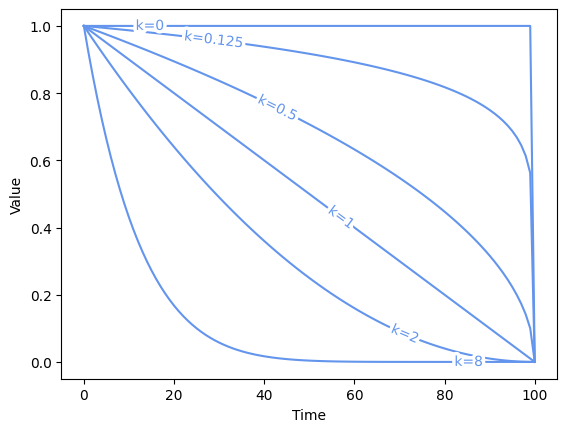

In [2]:
xs = list(range(0, 101))
ks = [0, 0.125, 0.5, 1, 2, 8]
parameters =[DepreciationParameters(k=shape_parameter) for shape_parameter in ks]

for k in parameters:
    ft = k.build_ft()
    ys = [ft(t) for t in range(k.n + 1)]
    plt.plot(xs, ys, label=f"k={k.k}", color='cornflowerblue' if k != 0 else 'coral')
labelLines(plt.gca().get_lines(), zorder=2.5)
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


Depreciation is linear for shape parameter, $k=1$. For shape parameters, $k{\lt}1$ depreciation starts slowly and accelerates near the end of the asset's useful life, defined by the periods_in_schedule parameter. For shape parameters, $k{\gt}1$ the opposite is true, i.e. depreciation is front loaded.

For $k{\ne}0$, the ft() function above is invertable

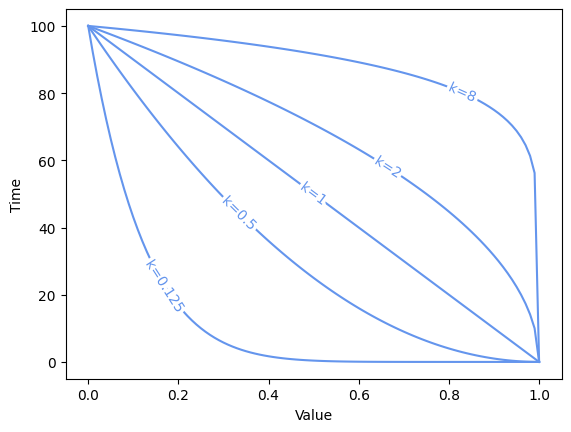

In [3]:
fts = [y / 100 for y in list(range(0, 101))]

for k in parameters[1:]:
    inverse_ft = k.build_inverse_ft()
    ts = [inverse_ft(y) for y in fts]
    plt.plot(fts, ts, label=f"k={k.k}", color='cornflowerblue')
labelLines(plt.gca().get_lines(), zorder=2.5)
plt.xlabel('Value')
plt.ylabel('Time')
plt.show()

An asset follows the depreciation schedule presented above if the required maintenance is performed. When less than the required maintenance is performed, this is models as an acceleration of the depreciation schedule. For instance,

>Suppose an asset requires 1 unit of maintenance each year to maintain the linear depreciation schedule for k=1. In t=0 the asset value=1.0, if the required maintenance is performed in t=1 the asset value=0.99. However, if 0 units of maintenance are provided then in t=1 the asset value will be 0.98 (the value from the original depreciation schedule associated with t=2). If 0.5 units of maintenance are performed in t=1 the asset experiences 1.5 time periods of depreciation (e.g. 1 schedule time period of deprecaition and 0.5 units of unschedule depreciation since only 50% of the schedule maintenance was performed), thus its value will be 0.985.

The example below shows how the asset depreciates if no maintenance is performed, and how it would depreciate if all schedule maintenace were performed.

0.5
[99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743710662, 99.498743

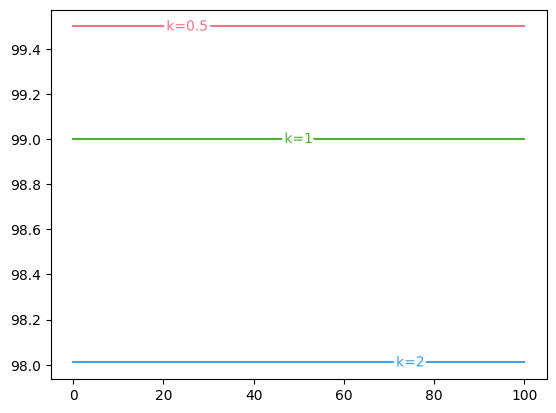

In [6]:
ts = list(range(0, 101))
colors = sns.color_palette('husl', len(parameters[2:5]))

assets = [Asset(parameters=params) for params in parameters[2:5]]
for i, z in enumerate(assets):
    ys = [z.depreciate(1.0).value for _ in ts]
    plt.plot(ts, ys, label=f"k={z.parameters.k}", color=colors[i])
labelLines(plt.gca().get_lines(), zorder=2.5)
plt.show()